In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [276]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [277]:
# Shape
df.shape

(730, 16)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [279]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


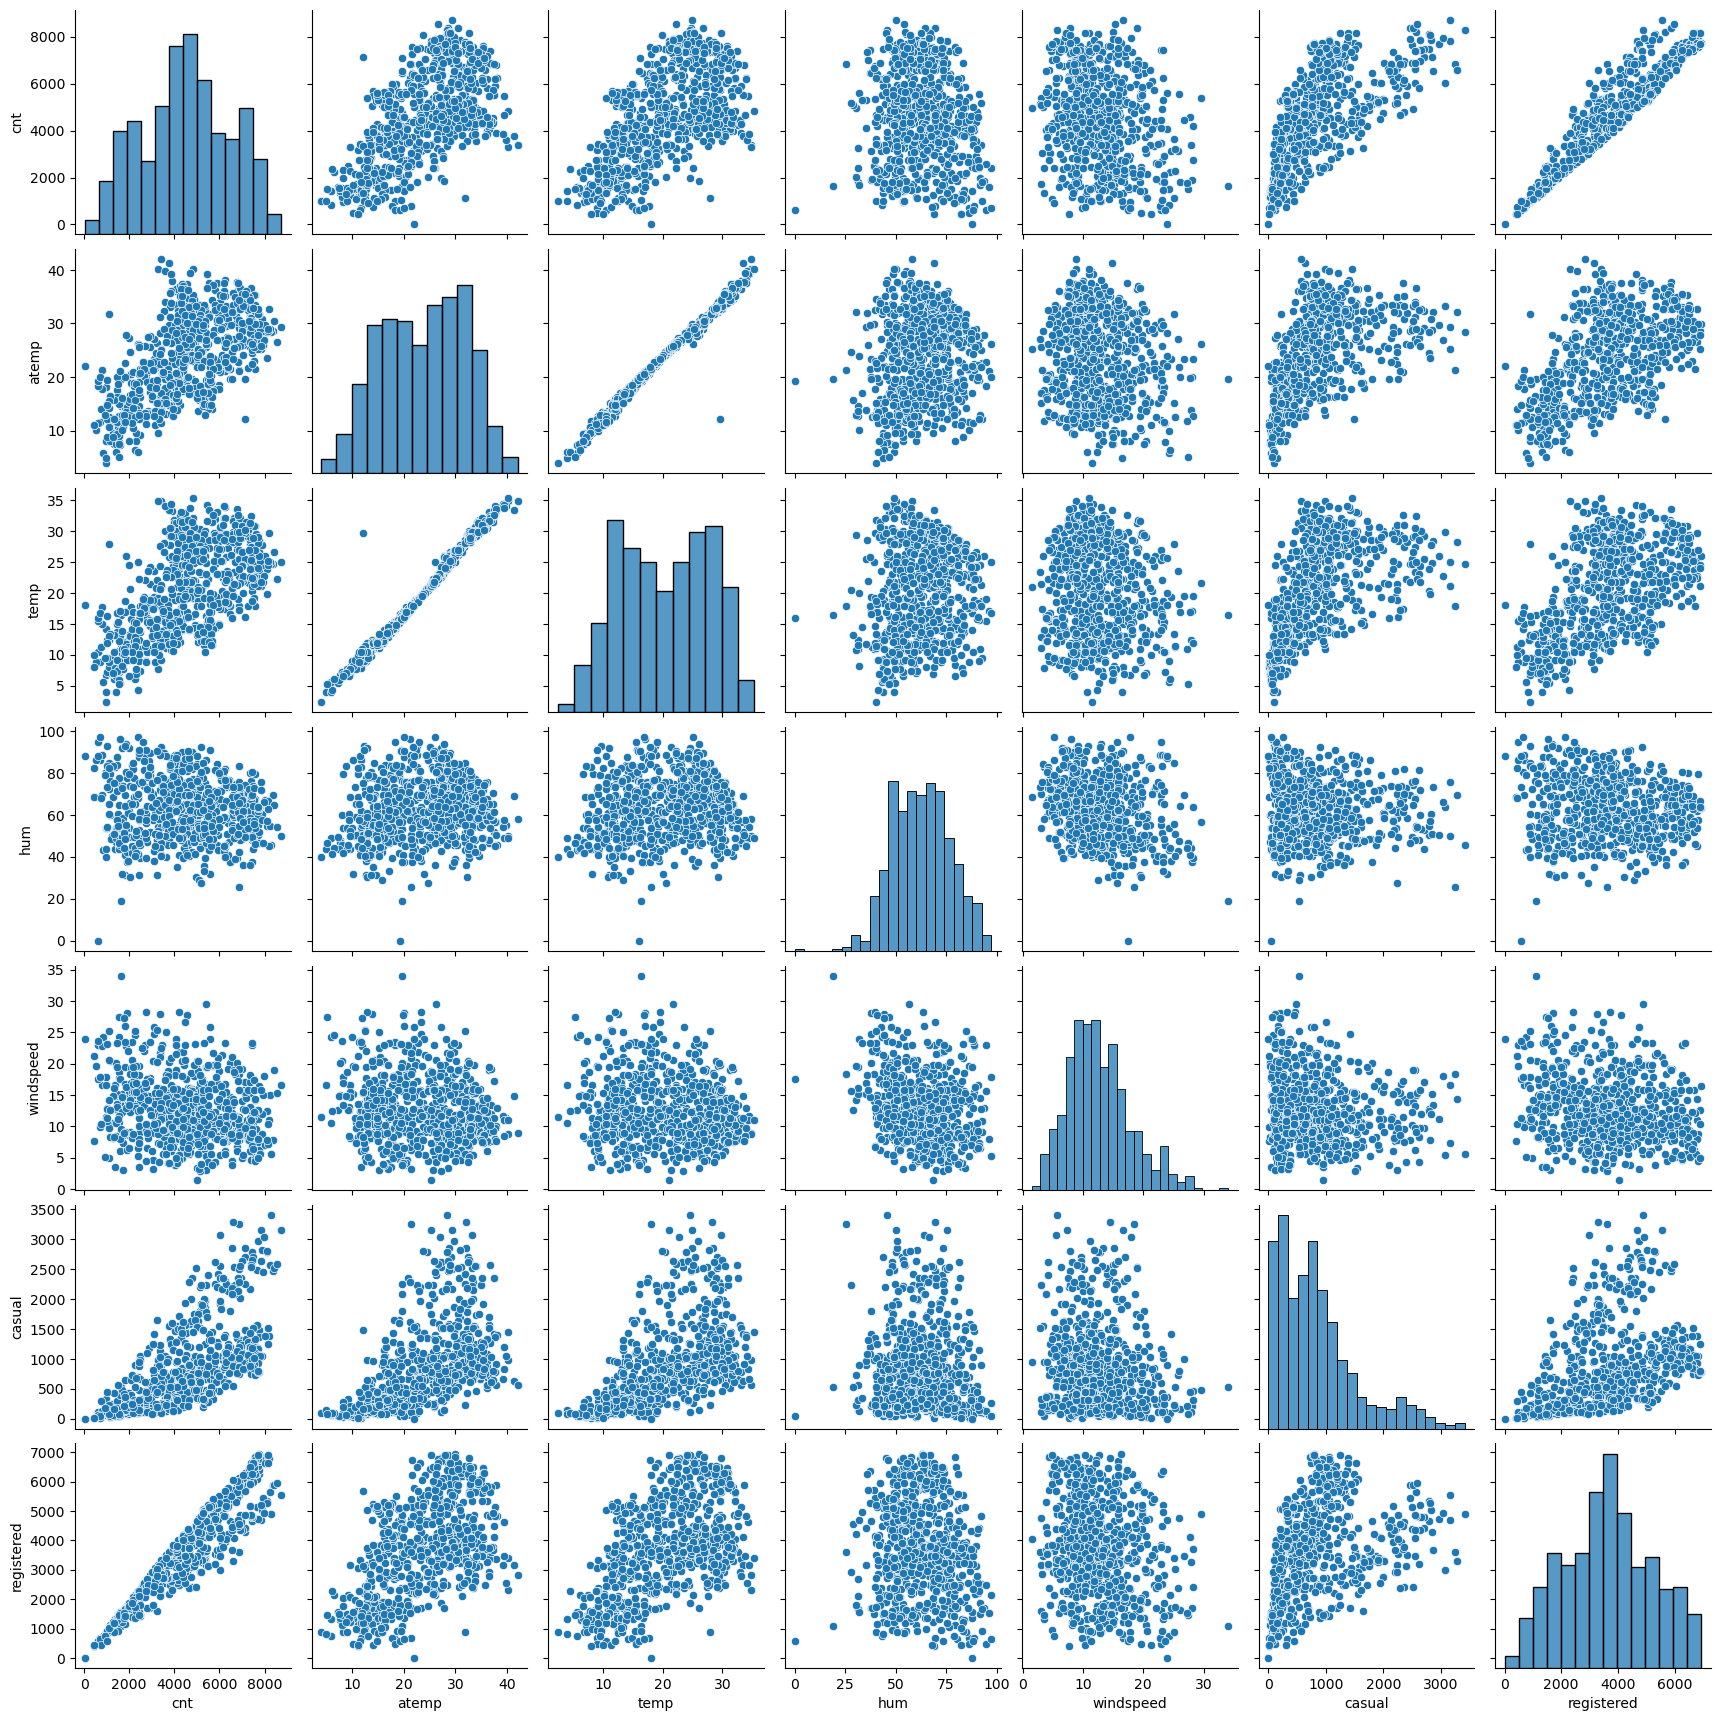

In [280]:
# Visualizing the numerical variables
numerical_variables = ['cnt', 'atemp', 'temp', 'hum', 'windspeed', 'casual', 'registered']
df[numerical_variables]
sns.pairplot(df[numerical_variables])
plt.show()

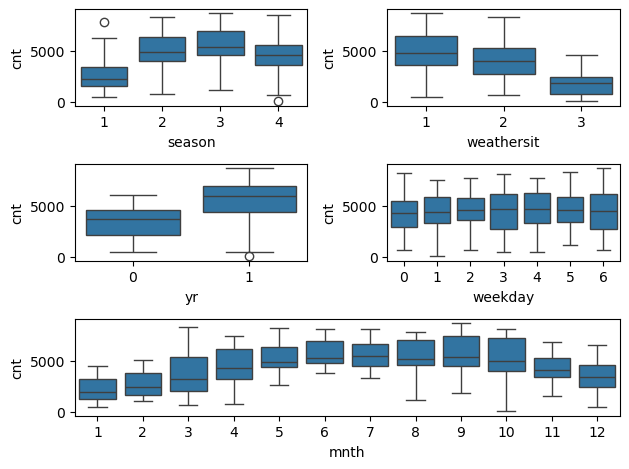

In [281]:
# Visualizing the categorical variables

# Season
plt.subplot(3,2,1)
sns.boxplot(x='season', y='cnt', data=df)

# Weathersit
plt.subplot(3,2,2)
sns.boxplot(x='weathersit', y='cnt', data=df)

# Year
plt.subplot(3,2,3)
sns.boxplot(x='yr', y='cnt', data=df)

# Weekday
plt.subplot(3,2,4)
sns.boxplot(x='weekday', y='cnt', data=df)

# Month
plt.subplot(3,2,(5,6))
sns.boxplot(x='mnth', y='cnt', data=df)

plt.tight_layout()
plt.show()

## Step 2: Data Prepartion

In [282]:
# Handling seasons data conversions
seasons = {
  1: 'spring',
  2: 'summer',
  3: 'fall',
  4: 'winter'
}
df.season = df.season.map(seasons)

In [283]:
# Handling weather situations data conversion
weather_situations = {
  1: 'clear',
  2: 'mist',
  3: 'light snow',
  4: 'heavy rain'
}
df.weathersit = df.weathersit.map(weather_situations)

In [284]:
# Handling month data conversion
months = {
  1: 'jan',
  2: 'feb',
  3: 'mar',
  4: 'apr',
  5: 'may',
  6: 'jun',
  7: 'jul',
  8: 'aug',
  9: 'sep',
  10: 'oct',
  11: 'nov',
  12: 'dec'
}
df.mnth = df.mnth.map(months)

In [285]:
# Handling weekdays data conversion
weekdays = {
  0: 'sun',
  1: 'mon',
  2: 'tue',
  3: 'wed',
  4: 'thur',
  5: 'fri',
  6: 'sat'
}
df.weekday = df.weekday.map(weekdays)

In [286]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping irrelavant columns:
1. `instant`: This is just an index and is not required as we already have an index present
2. `casual`: This can be deleted as `cnt` is a target variable
3. `registered`: This can be deleted as `cnt` is the target variable
4. `atemp`: From the pairplot, we can see that `atemp` and `temp` have a high linear correlation. So, let's remove `atemp`
5. `dteday`: This is redundant as we already have the `yr` and `mnth`

In [287]:
df = df.drop(columns=['dteday', 'casual', 'registered', 'instant', 'atemp'])

### Dummy variables

In [288]:
# Dummy variables for mnth
months = pd.get_dummies(df['mnth'], drop_first=True, dtype=int, prefix='mnth')
df = pd.concat([df, months], axis=1)
df = df.drop('mnth', axis=1)
df.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,spring,0,0,sat,0,mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,0,sun,0,mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,0,tue,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,0,wed,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [289]:
# Dummy variables for weekday
weekdays = pd.get_dummies(df['weekday'], drop_first=True, dtype=int, prefix='weekday')
df = pd.concat([df, weekdays], axis=1)
df = df.drop('weekday', axis=1)
df.head()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_aug,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed
0,spring,0,0,0,mist,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,0,0,mist,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,0,1,clear,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,0,1,clear,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,0,1,clear,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,1


In [290]:
# Dummy variables for season
months = pd.get_dummies(df['season'], drop_first=True, dtype=int)
df = pd.concat([df, months], axis=1)
df = df.drop('season', axis=1)
df.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,spring,summer,winter
0,0,0,0,mist,14.110847,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,mist,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,1,0,0


In [291]:
# Dummy variables for weathersit
weather = pd.get_dummies(df['weathersit'], drop_first=True, dtype=int)
df = pd.concat([df, weather], axis=1)
df = df.drop('weathersit', axis=1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,spring,summer,winter,light snow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,1,0,0,0,0


### Splitting into train and test

In [292]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=69)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Normalization

In [293]:
scaler = MinMaxScaler()

num_vars = ['cnt', 'temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,spring,summer,winter,light snow,mist
545,1,0,0,0.879548,0.528221,0.285895,0.634111,0,0,0,...,1,0,0,0,0,0,0,0,0,0
398,1,0,1,0.316749,0.432907,0.321817,0.448447,0,0,1,...,0,0,0,0,0,1,0,0,0,0
670,1,0,1,0.368668,0.427049,0.502572,0.653451,0,0,0,...,0,0,0,0,0,0,0,1,0,0
144,0,0,1,0.749751,0.649627,0.271798,0.548410,0,0,0,...,0,0,0,0,1,0,1,0,0,0
335,0,0,1,0.317788,0.559637,0.161548,0.422942,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Step 3: Training the Model

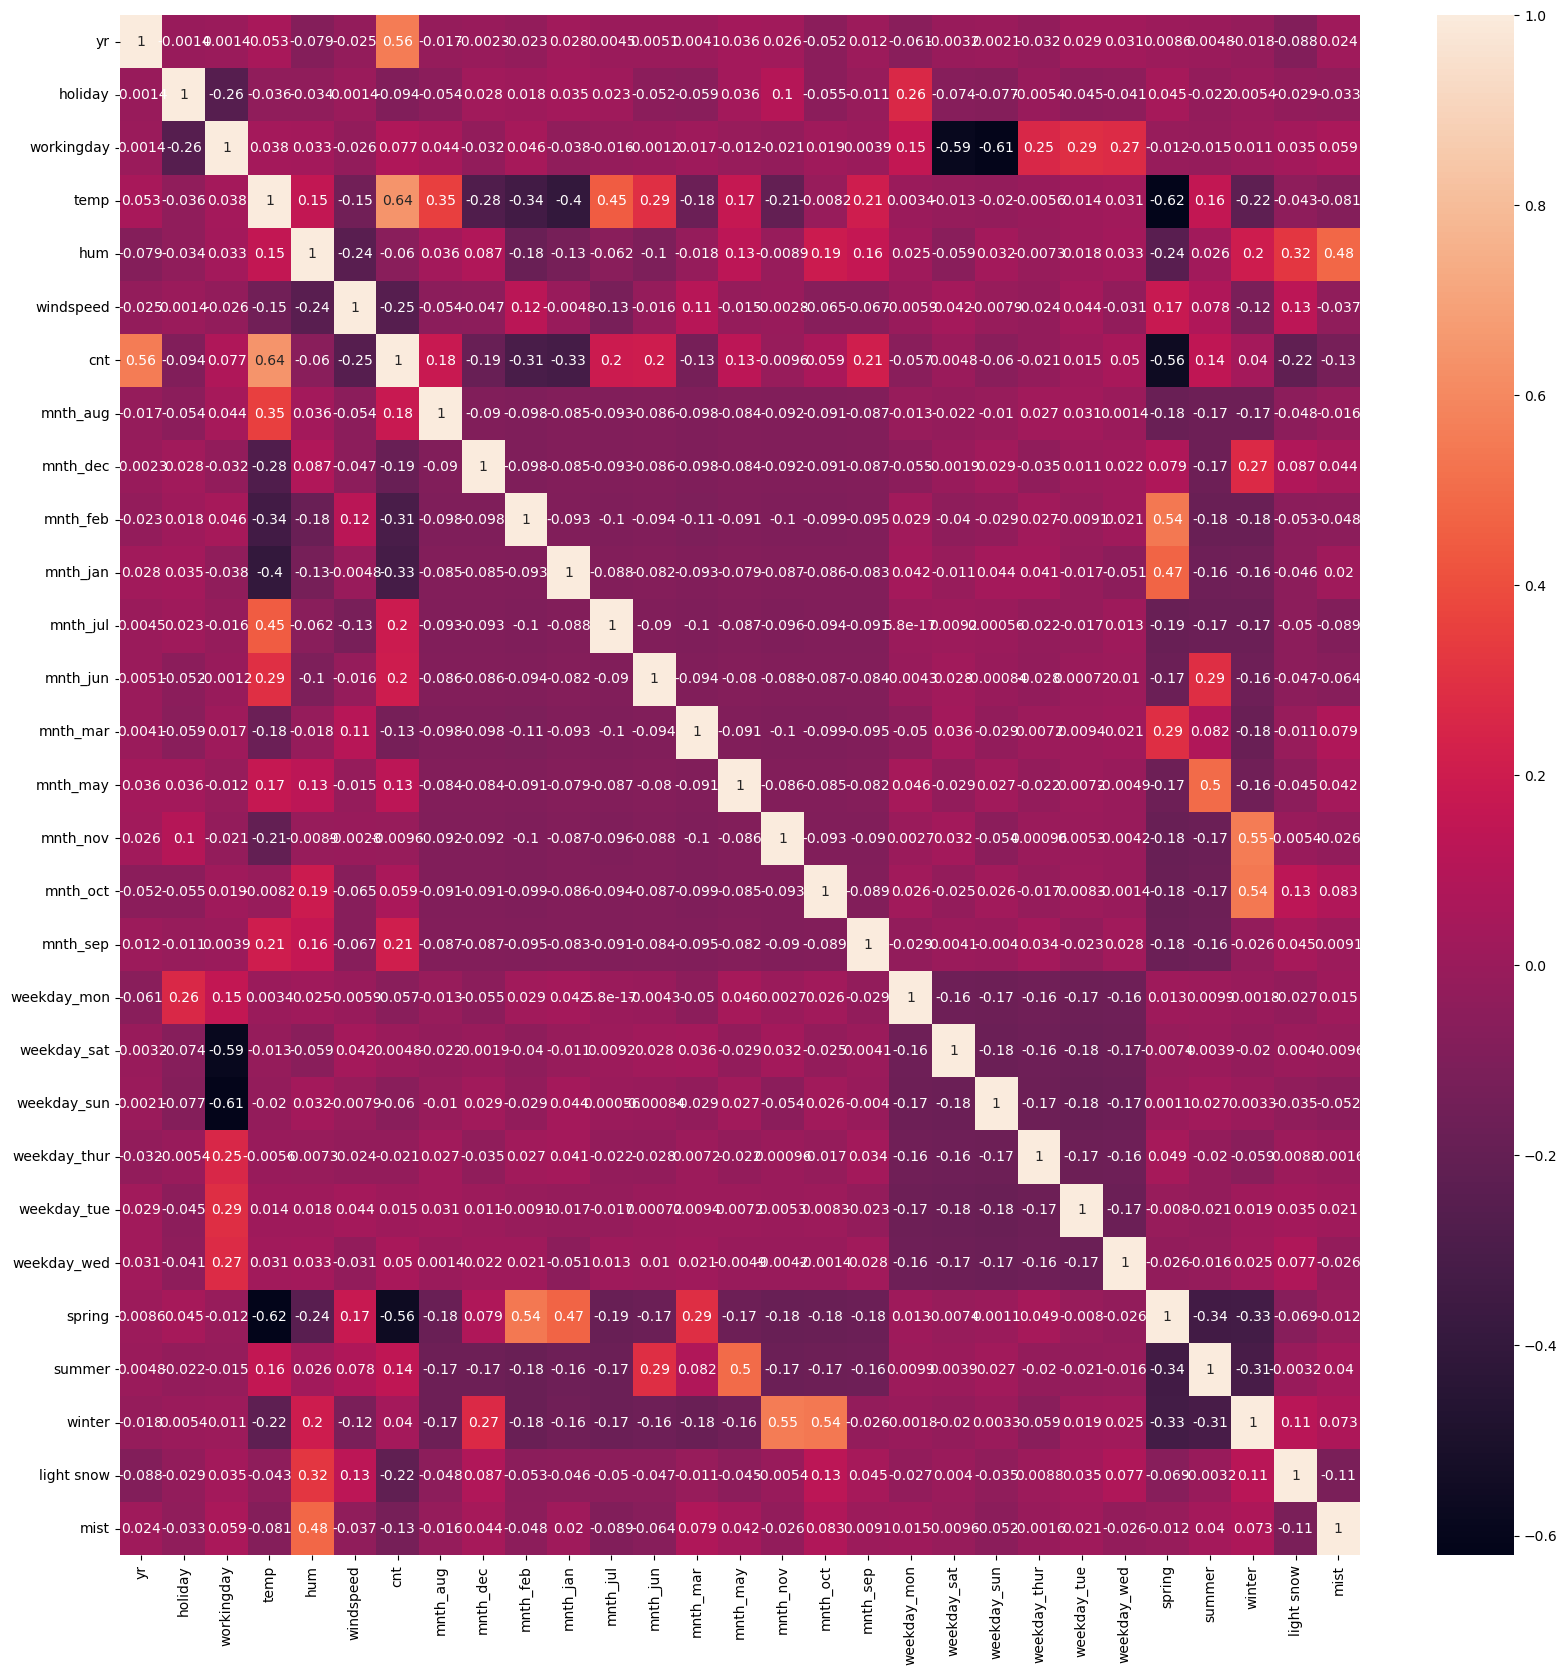

In [294]:
plt.figure(figsize=[20,20])
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [295]:
# Target variable
y_train = df_train.pop('cnt')

In [296]:
X_train = df_train

In [297]:
# Performing RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [298]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 7),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('spring', True, 1),
 ('summer', False, 16),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', False, 6)]

In [299]:
col = X_train.columns[rfe.support_]

### Building model using `statsmodel` for detailed analysis

In [300]:
X_train_rfe = X_train[col]

In [301]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [302]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [303]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          2.53e-184
Time:                        18:50:18   Log-Likelihood:                 478.37
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     497   BIC:                            -875.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2433      0.024     10.189      

Dropping `holiday` as it has a high p-value and is thus insignificant

In [304]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [305]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          2.53e-184
Time:                        18:50:18   Log-Likelihood:                 478.37
No. Observations:                 510   AIC:                            -930.7
Df Residuals:                     497   BIC:                            -875.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2383      0.038      6.337      

Dropping `weekday_sun` as it has a high p-value and is thus insignificant

In [306]:
X_train_new = X_train_new.drop(["weekday_sun"], axis = 1)

In [307]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          3.38e-184
Time:                        18:50:18   Log-Likelihood:                 475.26
No. Observations:                 510   AIC:                            -926.5
Df Residuals:                     498   BIC:                            -875.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2919      0.031      9.457      

In [308]:
X_train_new = X_train_lm.drop(['const'], axis=1)

In [309]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.56
3,hum,10.77
4,windspeed,5.03
1,workingday,4.27
8,spring,2.39
0,yr,2.02
9,winter,1.86
7,weekday_sat,1.68
5,mnth_jul,1.49
6,mnth_sep,1.20


In [310]:
# Let's drop hum as it has a high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     201.7
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          3.62e-168
Time:                        18:50:18   Log-Likelihood:                 434.56
No. Observations:                 510   AIC:                            -847.1
Df Residuals:                     499   BIC:                            -800.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1439      0.029      5.032      

In [311]:
# Calculating VIF again
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.95
3,windspeed,5.02
1,workingday,4.20
0,yr,2.02
7,spring,1.96
6,weekday_sat,1.67
8,winter,1.45
4,mnth_jul,1.44
5,mnth_sep,1.19
9,light snow,1.08


### Residual analysis of the train data

In [312]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

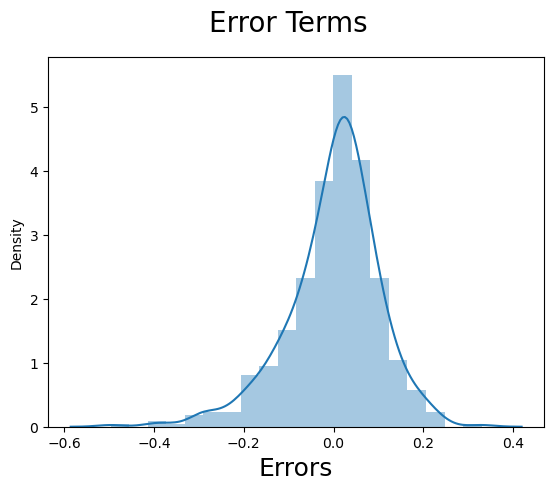

In [313]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

## Step 4: Making predictions

In [314]:
num_vars = ['cnt', 'temp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,spring,summer,winter,light snow,mist
537,1,0,1,0.895124,0.493077,0.330777,0.650550,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,1,0.290384,0.707760,0.383295,0.146138,0,0,0,...,0,0,0,0,1,1,0,0,0,1
611,1,0,1,0.830744,0.724707,0.441027,0.776381,0,0,0,...,0,0,0,1,0,0,0,0,0,0
654,1,0,1,0.494311,0.645367,0.162820,0.848543,0,0,0,...,0,0,0,0,1,0,0,1,0,0
10,0,0,1,0.137016,0.636993,0.205620,0.099359,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [315]:
y_test = df_test.pop('cnt')
X_test = df_test

In [316]:
X_train_new = X_train_lm.drop(['const'], axis=1)

In [317]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [318]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

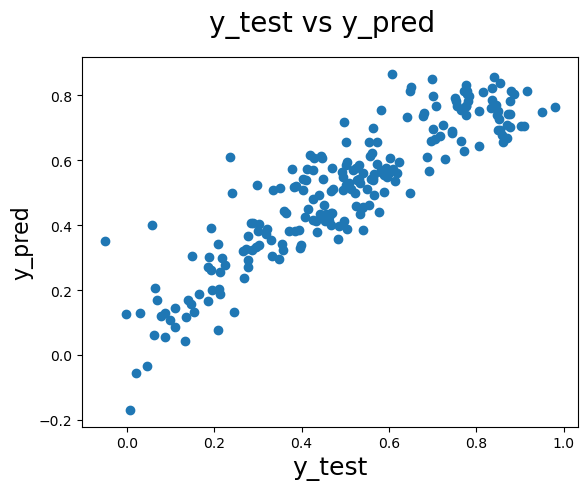

In [319]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [320]:
# Evaluate
r2_score(y_test, y_pred)

0.8037321508116879